**Pedestrian and bicyclist activities**
<a id='4_Pedestrian-and-bicyclists-activities'></a>

- [Step 1. Import data](#import-data)
- [Step 2. Activities analysis](#activities-analyis)
    - [(1) Total pedestrian/bicyclist volume](#total-pedestrian/bicyclist-volume)
    - [(2) Volume for each direction](#volume-for-each-direction)  


In [1]:
import src
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import data

<a id='import-data'></a>
[[back to top](#4_Pedestrian-and-bicyclists-activities)]

<mark>User input: Type the name of the location to be analyzed</mark>

The location name will show on the figures of the crash analysis results.

In [2]:
LocationName = 'Demo Intersection'

<mark>User input: Save the Miovision (traffic counts) Excel sheet in the **source_data** folder </mark>

In [3]:
# Find the target xlsx file
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "/source_data/*.xlsx"))
for f in csv_files:
    print(f.split('\\')[-1])

<mark>User input: Select the excel sheet to be analyzed</mark>

In [4]:
file_name = 'MiovisionCounts.xlsx'

In [5]:
path = './source_data/'+file_name
Total_Volume_Class_Breakdown = pd.read_excel(path, sheet_name='Total Volume Class Breakdown',index_col=0,header=[0,1,2])

<Mark> User input: Enter the start time and end time that you want to plot </Mark>

In [6]:
start_time = '2021-09-23 07:00:00'
end_time = '2021-09-23 18:45:00'

In [7]:
start_idx = Total_Volume_Class_Breakdown.index.get_loc(start_time)
end_idx = Total_Volume_Class_Breakdown.index.get_loc(end_time)

# Step 2: Activities analysis

<a id='activities-analyis'></a>
[[back to top](#4_Pedestrian-and-bicyclists-activities)]

## (1) Total pedestrian/bicyclist volume
<a id='total-pedestrian/bicyclist-volume'></a>
[[back to top](#4_Pedestrian-and-bicyclists-activities)]

<Mark> Comment out or skip if the direction does not exist </Mark>

For example, if there is only north leg, east leg, and south leg, then skip the cell of the west leg (cell 14).

In [8]:
Sum_North_Leg_Peds = Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:][[('North', 'Southbound',   'Peds CW'),('North', 'Southbound',  'Peds CCW')]].sum(axis=1)
Sum_East_Leg_Peds = Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:][[('East',  'Westbound',   'Peds CW'),('East',  'Westbound',  'Peds CCW')]].sum(axis=1)
Sum_South_Leg_Peds = Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:][[('South', 'Northbound',   'Peds CW'),('South', 'Northbound',  'Peds CCW')]].sum(axis=1)
Sum_West_Leg_Peds = Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:][[('West', 'Eastbound',   'Peds CW'),('West', 'Eastbound',  'Peds CCW')]].sum(axis=1)

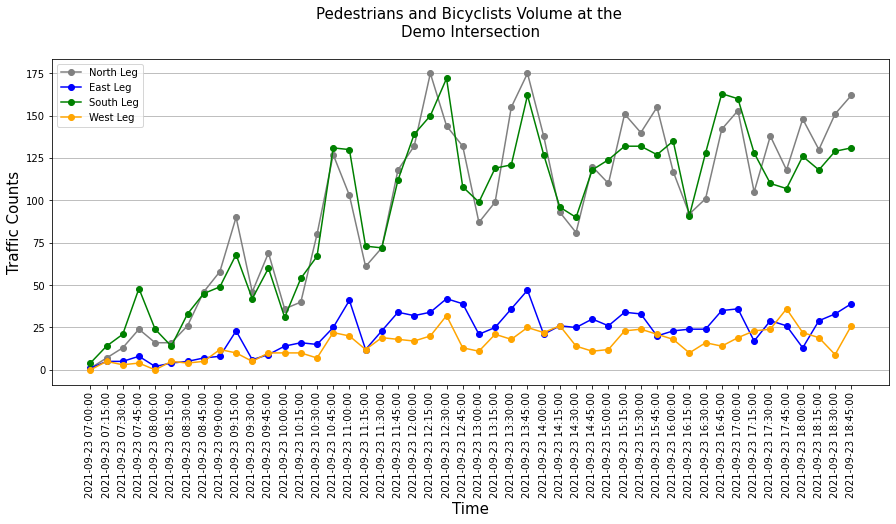

In [9]:
fig, ax = plt.subplots(figsize = (15,6))

plt.plot(np.arange(len(Sum_North_Leg_Peds)),Sum_North_Leg_Peds, linestyle='-', marker='o', color='grey')
plt.plot(np.arange(len(Sum_East_Leg_Peds)),Sum_East_Leg_Peds, linestyle='-', marker='o', color='blue')
plt.plot(np.arange(len(Sum_South_Leg_Peds)),Sum_South_Leg_Peds, linestyle='-', marker='o', color='green')
plt.plot(np.arange(len(Sum_West_Leg_Peds)),Sum_West_Leg_Peds, linestyle='-', marker='o', color='orange')

plt.xlabel('Time',fontsize=15)
plt.xticks(np.arange(len(Sum_North_Leg_Peds.index)),Sum_North_Leg_Peds.index,rotation=90)
plt.ylabel('Traffic Counts',fontsize=15) 
plt.legend(['North Leg','East Leg','South Leg','West Leg']) 

ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.1)
plt.grid(axis='y')
plt.title('Pedestrians and Bicyclists Volume at the \n'+LocationName, y=1.05,fontsize=15)
plt.savefig("./analysis_results/Pedestrians and Bicyclists Volume.png", bbox_inches='tight', dpi=600)

In [10]:
# Clockwise
Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:].sum().xs('Peds CW',axis=0, level=2, drop_level=False)

Leg    Direction   Start Time
North  Southbound  Peds CW       2249.0
East   Westbound   Peds CW        574.0
South  Northbound  Peds CW       2394.0
West   Eastbound   Peds CW        369.0
dtype: float64

In [11]:
# Counter Clockwise
Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:].sum().xs('Peds CCW',axis=0, level=2, drop_level=False)

Leg    Direction   Start Time
North  Southbound  Peds CCW      2444.0
East   Westbound   Peds CCW       508.0
South  Northbound  Peds CCW      2240.0
West   Eastbound   Peds CCW       358.0
dtype: float64

## (2) Volume for each direction
<a id='volume-for-each-direction'></a>
[[back to top](#4_Pedestrian-and-bicyclists-activities)]


[Miovision Clockwise (CW) and Counter-Clockwise (CCW) direction](https://help.miovision.com/s/article/How-Pedestrian-and-Bicycle-Volumes-on-Crosswalk-are-Reported?language=en_US)

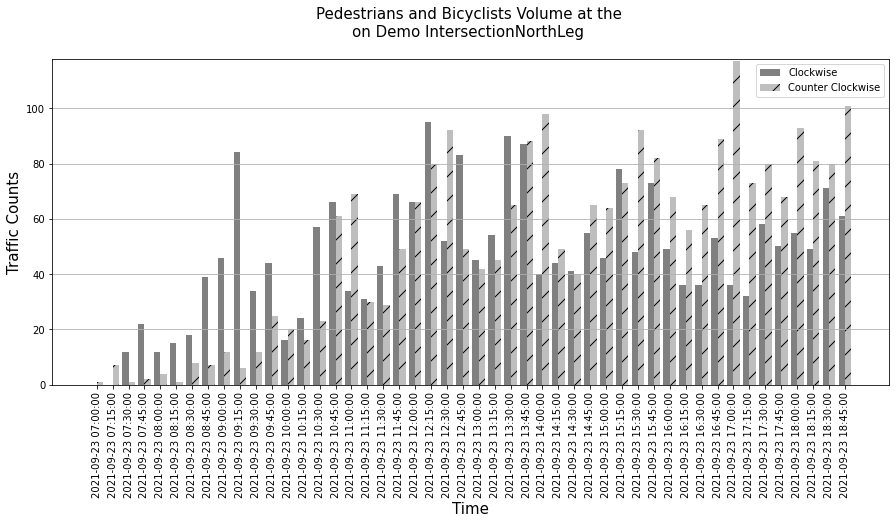

In [12]:
leg,direction,color = 'North','Southbound','grey'
src.plot_ped_bicy_per_direction(LocationName,Total_Volume_Class_Breakdown,leg,direction,color,start_time,end_time)

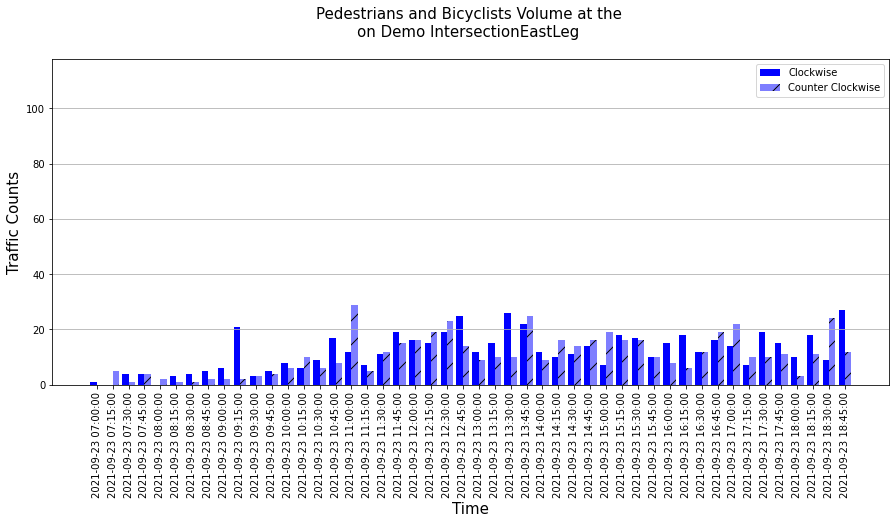

In [13]:
leg,direction,color = 'East','Westbound','blue'
src.plot_ped_bicy_per_direction(LocationName,Total_Volume_Class_Breakdown,leg,direction,color,start_time,end_time)

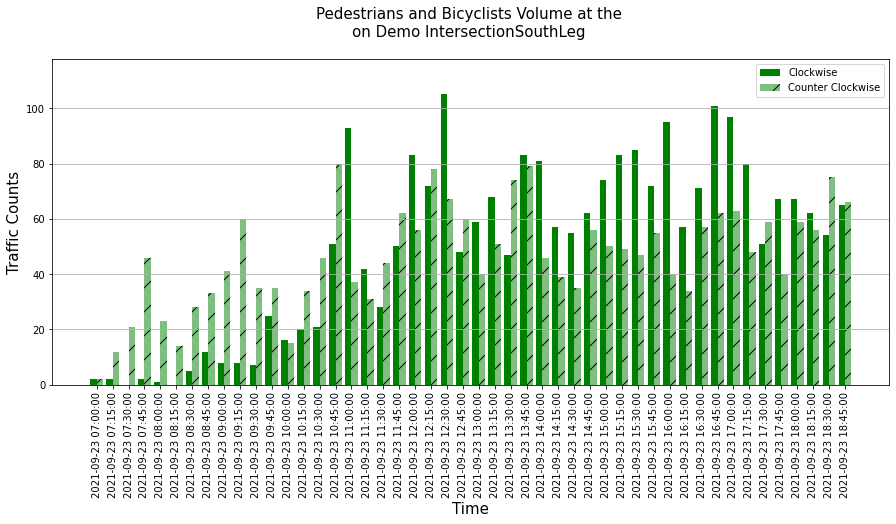

In [14]:
leg,direction,color = 'South','Northbound','green'
src.plot_ped_bicy_per_direction(LocationName,Total_Volume_Class_Breakdown,leg,direction,color,start_time,end_time)

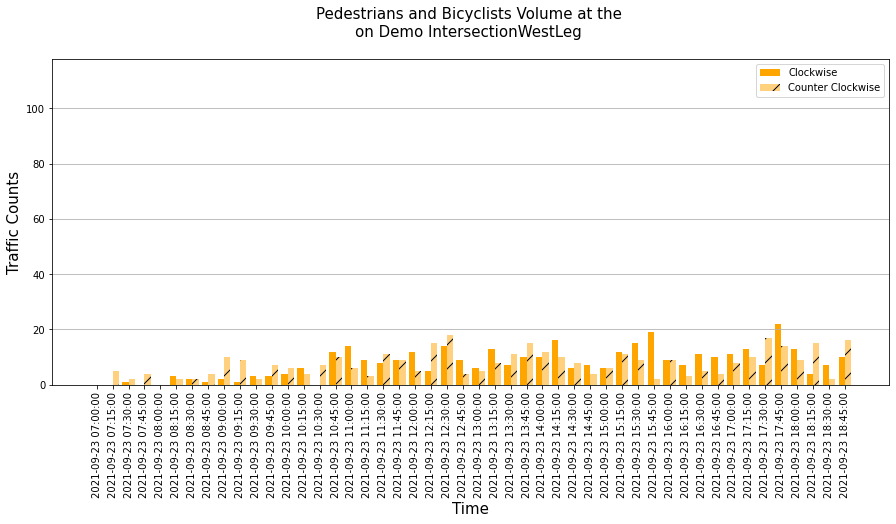

In [15]:
leg,direction,color = 'West','Eastbound','orange'
src.plot_ped_bicy_per_direction(LocationName,Total_Volume_Class_Breakdown,leg,direction,color,start_time,end_time)